In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#read in the data 

df=pd.read_csv(r"C:\Users\AnnieChao\Downloads\movies.csv\movies.csv")

C:\Users\AnnieChao\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\AnnieChao\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\AnnieChao\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
#See if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

    
#so every single rows in filled in!

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
#Data type for our columns 

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#drop null values

#print(df.isnull())

df = df.dropna()

In [6]:
#change datatype of columns

df = df.dropna(subset=['budget', 'gross']).copy()

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [7]:
df

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  \
0     1980      June 13, 1980 (United States)    8.4   927000   
1     1980       July 2, 1980 (United States)    5.8    65000   
2     1980      June 20, 1980 (United States)    8.7  1200000   
3     1980       July 2, 1980 (United States)    7.7   221000   
4     1980      July 25, 1980 (United States)    7.3   108000   
...    ...                                ...    ...      ...   
7648  2020   January 17, 2020 (United States)    6.6   140000   
7649  2020  February 14, 2020 (United States)    6.5   102000   
7650  2020   January 17, 2020 (United States)    5.6    53000   
7651  2020  February 21, 2020 (United States)    6.8    42000   
7652  2020    August 28, 2020 (United States)    6.8     3700   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.      146  
1                       Columbia Pictures      104  
2                               Lucasfilm      124  
3                      Paramount Pictures       88  
4                          Orion Pictures       98  
...                                   ...      ...  
7648                    Columbia Pictures      124  
7649                   Paramount Pictures       99  
7650                   Universal Pictures      101  
7651                 20th Century Studios      100  
7652  Beijing Diqi Yinxiang Entertainment      149  

[5421 rows x 15 columns]

In [8]:
#fix the year and year of released 

df['yearcorrect'] = df['released'].str.extract(r'(\d{4})').astype('int64')

In [9]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes            int64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime          int64
yearcorrect      int64
dtype: object

In [10]:
(df['year']==df['yearcorrect']).sum()

4713

In [11]:
#there are 708 rows from year that do not match with yearcorrect
(df['year']!=df['yearcorrect']).sum()
       

708

In [12]:
#Order by gross value in descending order
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating   genre  year  \
5445                                      Avatar      PG-13  Action  2009   
7445                           Avengers: Endgame      PG-13  Action  2019   
3045                                     Titanic      PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens      PG-13  Action  2015   
7244                      Avengers: Infinity War      PG-13  Action  2018   
...                                          ...        ...     ...   ...   
5640                                 Tanner Hall          R   Drama  2009   
2434                  Philadelphia Experiment II      PG-13  Action  1993   
3681                                Ginger Snaps  Not Rated   Drama  2000   
272                                     Parasite          R  Horror  1982   
3203                                  Trojan War      PG-13  Comedy  1997   

                               released  score    votes             director  \
5445  December 18, 2009 (United States)    7.8  1100000        James Cameron   
7445     April 26, 2019 (United States)    8.4   903000        Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000        James Cameron   
6663  December 18, 2015 (United States)    7.8   876000          J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000        Anthony Russo   
...                                 ...    ...      ...                  ...   
5640          January 15, 2015 (Sweden)    5.8     3500  Francesca Gregorini   
2434         June 4, 1994 (South Korea)    4.5     1900     Stephen Cornwell   
3681              May 11, 2001 (Canada)    6.8    43000         John Fawcett   
272      March 12, 1982 (United States)    3.9     2300         Charles Band   
3203           October 1, 1997 (Brazil)    5.7     5800         George Huang   

                       writer               star        country     budget  \
5445            James Cameron    Sam Worthington  United States  237000000   
7445       Christopher Markus  Robert Downey Jr.  United States  356000000   
3045            James Cameron  Leonardo DiCaprio  United States  200000000   
6663          Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244       Christopher Markus  Robert Downey Jr.  United States  321000000   
...                       ...                ...            ...        ...   
5640  Tatiana von Fürstenberg        Rooney Mara  United States    3000000   
2434       Wallace C. Bennett       Brad Johnson  United States    5000000   
3681             Karen Walton      Emily Perkins         Canada    5000000   
272             Alan J. Adler    Robert Glaudini  United States     800000   
3203                Andy Burg       Will Friedle  United States   15000000   

           gross                    company  runtime  yearcorrect  
5445  2847246203      Twentieth Century Fox      162         2009  
7445  2797501328             Marvel Studios      181         2019  
3045  2201647264      Twentieth Century Fox      194         1997  
6663  2069521700                  Lucasfilm      138         2015  
7244  2048359754             Marvel Studios      149         2018  
...          ...                        ...      ...          ...  
5640        5073           Two Prong Lesson       96         2015  
2434        2970           Trimark Pictures       97         1994  
3681        2554  Copperheart Entertainment      108         2001  
272         2270           Embassy Pictures       85         1982  
3203         309                   Daybreak       85         1997  

[5421 rows x 16 columns]

In [13]:
#Modify the year from December 18, 2009 (United States) to December 18, 2009

df['released_date']=df['released'].astype('str').replace(r'\s*\(.*?\)', '',regex=True)
df['released_date'] = pd.to_datetime(df['released_date'], errors='coerce')
df.drop(columns=['released'])

name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year  score    votes         director                   writer  \
0     1980    8.4   927000  Stanley Kubrick             Stephen King   
1     1980    5.8    65000   Randal Kleiser  Henry De Vere Stacpoole   
2     1980    8.7  1200000   Irvin Kershner           Leigh Brackett   
3     1980    7.7   221000     Jim Abrahams             Jim Abrahams   
4     1980    7.3   108000     Harold Ramis       Brian Doyle-Murray   
...    ...    ...      ...              ...                      ...   
7648  2020    6.6   140000     Adil El Arbi              Peter Craig   
7649  2020    6.5   102000      Jeff Fowler                Pat Casey   
7650  2020    5.6    53000   Stephen Gaghan           Stephen Gaghan   
7651  2020    6.8    42000    Chris Sanders            Michael Green   
7652  2020    6.8     3700          Hu Guan                  Hu Guan   

                   star         country     budget      gross  \
0        Jack Nicholson  United Kingdom   19000000   46998772   
1        Brooke Shields   United States    4500000   58853106   
2           Mark Hamill   United States   18000000  538375067   
3           Robert Hays   United States    3500000   83453539   
4           Chevy Chase   United States    6000000   39846344   
...                 ...             ...        ...        ...   
7648         Will Smith   United States   90000000  426505244   
7649       Ben Schwartz   United States   85000000  319715683   
7650  Robert Downey Jr.   United States  175000000  245487753   
7651      Harrison Ford          Canada  135000000  111105497   
7652    Zhi-zhong Huang           China   80000000  461421559   

                                  company  runtime  yearcorrect released_date  
0                            Warner Bros.      146         1980    1980-06-13  
1                       Columbia Pictures      104         1980    1980-07-02  
2                               Lucasfilm      124         1980    1980-06-20  
3                      Paramount Pictures       88         1980    1980-07-02  
4                          Orion Pictures       98         1980    1980-07-25  
...                                   ...      ...          ...           ...  
7648                    Columbia Pictures      124         2020    2020-01-17  
7649                   Paramount Pictures       99         2020    2020-02-14  
7650                   Universal Pictures      101         2020    2020-01-17  
7651                 20th Century Studios      100         2020    2020-02-21  
7652  Beijing Diqi Yinxiang Entertainment      149         2020    2020-08-28  

[5421 rows x 16 columns]

In [14]:

df[df['name']=="The Shining"]

name rating  genre  year                       released  score  \
0  The Shining      R  Drama  1980  June 13, 1980 (United States)    8.4   

    votes         director        writer            star         country  \
0  927000  Stanley Kubrick  Stephen King  Jack Nicholson  United Kingdom   

     budget     gross       company  runtime  yearcorrect released_date  
0  19000000  46998772  Warner Bros.      146         1980    1980-06-13

In [15]:
#This allows us to generate a scrollable table
pd.set_option('display.max_rows', None)

In [17]:
#Drop any duplicates 

df['company'].drop_duplicates()

0                                            Warner Bros.
1                                       Columbia Pictures
2                                               Lucasfilm
3                                      Paramount Pictures
4                                          Orion Pictures
6                                      Universal Pictures
7                            Chartoff-Winkler Productions
8                                          Dovemead Films
9                                          United Artists
10                                    The Malpaso Company
11                                           C.A.T. Films
14                                      Filmways Pictures
15                                        Rastar Pictures
17                                              IPC Films
18                                  AVCO Embassy Pictures
20                             Lorimar Film Entertainment
21                                   Partisan Productions
22            

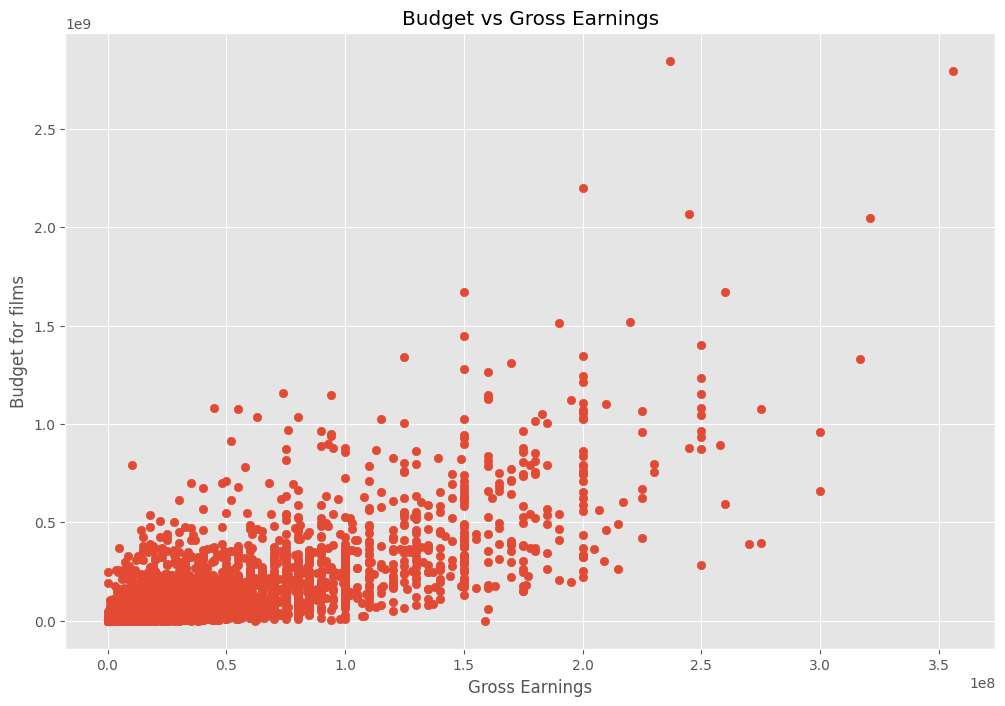

In [19]:
#Budget will have high correlation 
#Company will have high correlation 
#Build scatter plot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for films')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

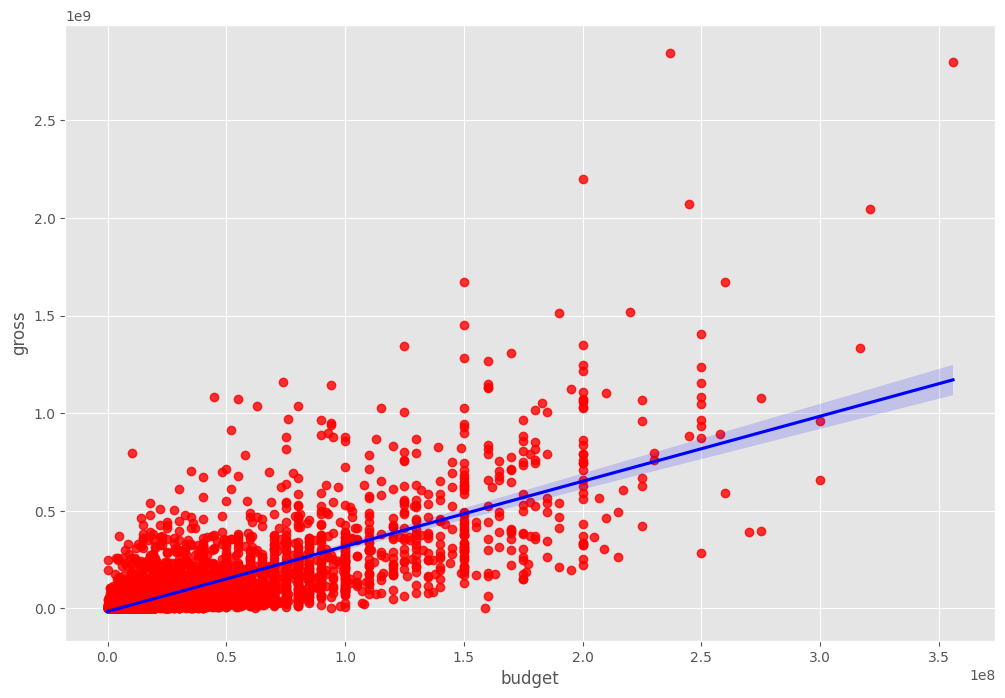

In [21]:
#Determine if this is correlated using Seaborn, plot budget vs gross
#this gives a positve correlation 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [25]:
df.corr(numeric_only=True) #pearson kendall spearman 
#High correlation between budget and gross 

year     score     votes    budget     gross   runtime  \
year         1.000000  0.056386  0.206021  0.327722  0.274321  0.075077   
score        0.056386  1.000000  0.474256  0.072001  0.222556  0.414068   
votes        0.206021  0.474256  1.000000  0.439675  0.614751  0.352303   
budget       0.327722  0.072001  0.439675  1.000000  0.740247  0.318695   
gross        0.274321  0.222556  0.614751  0.740247  1.000000  0.275796   
runtime      0.075077  0.414068  0.352303  0.318695  0.275796  1.000000   
yearcorrect  0.998726  0.061923  0.203098  0.320312  0.268721  0.075294   

             yearcorrect  
year            0.998726  
score           0.061923  
votes           0.203098  
budget          0.320312  
gross           0.268721  
runtime         0.075294  
yearcorrect     1.000000

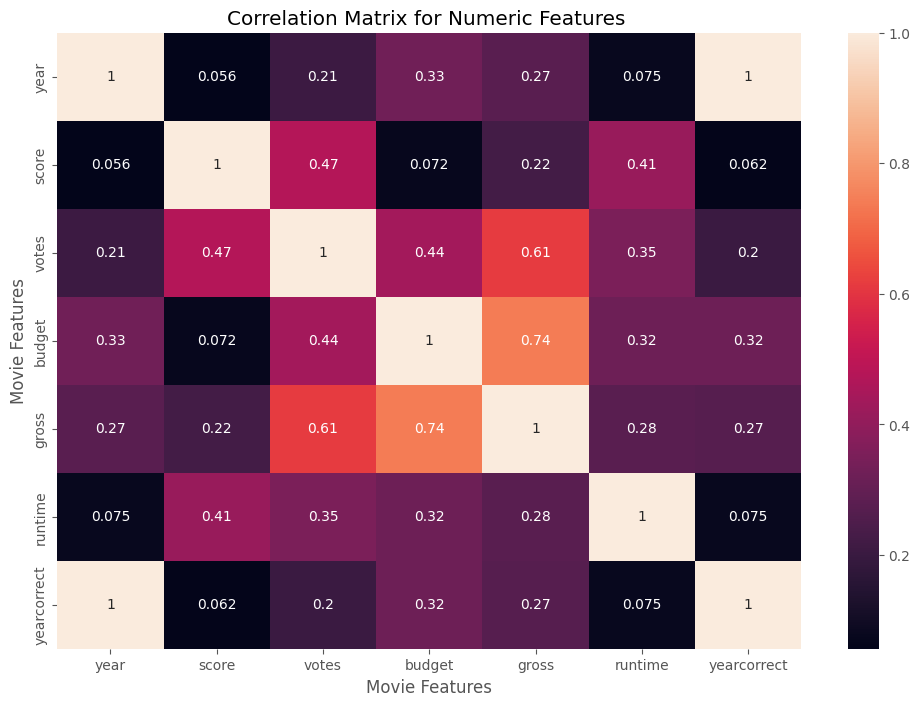

In [27]:
#Correlation matrix, budget and gross has a high correlation 0.74
correlation_matrix = df.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [28]:
#Look ar Company 

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect released_date  
0   46998772        Warner Bros.      146         1980    1980-06-13  
1   58853106   Columbia Pictures      104         1980    1980-07-02  
2  538375067           Lucasfilm      124         1980    1980-06-20  
3   83453539  Paramount Pictures       88         1980    1980-07-02  
4   39846344      Orion Pictures       98         1980    1980-07-25

In [29]:
df_numerized = df

for col_name in df_numerized.columns: 
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
        #It returns the numeric code (integer) for each category in that column.
        #Each unique category is assigned an integer code, starting from 0.
        
        
df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
0     4692       6      6  1980      1304    8.4   927000      1795    2832   
1     3929       6      1  1980      1127    5.8    65000      1578    1158   
2     3641       4      0  1980      1359    8.7  1200000       757    1818   
3      204       4      4  1980      1127    7.7   221000       889    1413   
4      732       6      4  1980      1170    7.3   108000       719     351   
5     1509       6      9  1980      1922    6.4   123000      1758    3081   
6     3930       6      0  1980      1359    7.9   188000       974     576   
7     3122       6      3  1980       530    8.2   330000      1269    1257   
8     3732       4      0  1980      1346    6.8   101000      1606    1402   
9     4401       6      3  1980      1755    7.0    10000      2011     280   
10     332       4      0  1980       510    6.1    18000       236    2810   
11    4179       4      1  1980      2272    7.3    54000       817    1300   
12    3029       4      1  1980       471    5.3    30000      1643    1658   
13    2859       6      6  1980      2416    7.7    49000      1666    1653   
14    1208       6      5  1980      1170    7.1    37000       207     350   
15    3553       4      6  1980      2294    7.2    27000       847    2507   
17      66       4      4  1980       530    6.9    29000       333    2315   
18    4143       6      9  1980       832    6.8    66000       943    1486   
20     986       6      5  1980       714    6.5    20000      2032    3151   
21    1762       6      1  1980       117    6.8    14000      1307    2065   
22    4128       4      0  1980       213    6.7    22000       502    2959   
23    5289       4      8  1980       437    5.3    12000      1654    2492   
28     700       6      5  1980      1359    7.2    17000      1870    3099   
29     261       6      5  1980       667    6.2    22000      1489    2358   
33     785       4      6  1980       117    6.1      604      1146     673   
35    3068       6      4  1980      2156    6.2    24000       744    2207   
36    4245       6      4  1980      1883    6.3     4300       581     966   
37    2618       6      4  1980      2257    6.0    11000      1116    2578   
42    4736       6      0  1980      1413    7.1     9000      1613    1802   
46    4312       6      0  1980      1304    5.3     3900      1337    2383   
48    4512       4      0  1980      1922    5.1     3100       329    2036   
50    3648       4      4  1980      2476    7.3    22000      2043    3184   
51    2497       6      4  1980      2416    6.8     4500      1025     303   
53     692       4      0  1980      1289    6.1    11000       327     768   
56    5193       4      0  1980      1629    4.6     2600       793    1078   
57    2818       4      4  1980      1051    5.4     2400       914    2623   
58    4519       6      0  1980       261    5.1     5200       551    1819   
75    4351       1      1  1980      1399    5.8     1300       267     939   
77    5240       6      4  1980       261    5.9      415      1484    1339   
80    2971       6      6  1980      2551    4.0      546       969    1014   
92    1973       4      0  1981      1296    8.4   905000      1859    1806   
94     284       6      4  1981       314    7.5    97000       974    1524   
95    1301       6      0  1981      1040    7.2   131000       943    1486   
96    4100       2      9  1981        46    7.5   192000      1735    2707   
97    3031       6      4  1981      1568    6.2    40000       177     307   
98     603       6      5  1981      1162    7.4    47000       207     350   
99     861       4      0  1981      1296    6.9    42000       478     277   
100   1329       6      1  1981        11    7.4    59000       937    2963   
101   2389       6      0  1981      1805    7.6   170000       654    2941   
103   3699       6      4  1981      1406    6.9    6800

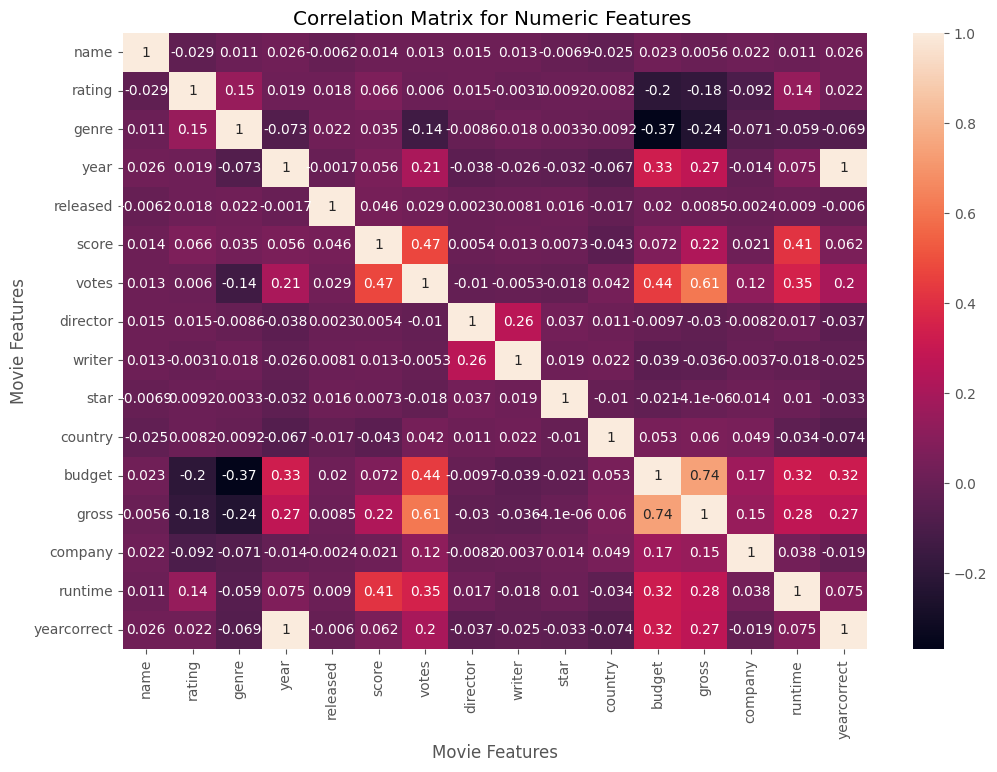

In [30]:
#Correlation matrix, budget and gross has a high correlation 0.74
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features ')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [32]:
correlation_mat=df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs #this shows all the correlation coeifficients of each category

name           name             1.000000
               rating          -0.029234
               genre            0.010996
               year             0.025542
               released        -0.006152
               score            0.014450
               votes            0.012615
               director         0.015246
               writer           0.012880
               star            -0.006882
               country         -0.025490
               budget           0.023392
               gross            0.005639
               company          0.021697
               runtime          0.010850
               yearcorrect      0.025542
               released_date    0.025227
rating         name            -0.029234
               rating           1.000000
               genre            0.147796
               year             0.019499
               released         0.018083
               score            0.065983
               votes            0.006031
               d

In [33]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head() 

genre          budget          -0.368523
budget         genre           -0.368523
genre          gross           -0.244101
gross          genre           -0.244101
budget         rating          -0.203946
rating         budget          -0.203946
               gross           -0.181906
gross          rating          -0.181906
votes          genre           -0.135990
genre          votes           -0.135990
company        rating          -0.092357
rating         company         -0.092357
released_date  genre           -0.075551
genre          released_date   -0.075551
country        yearcorrect     -0.073569
yearcorrect    country         -0.073569
genre          year            -0.073167
year           genre           -0.073167
company        genre           -0.071334
genre          company         -0.071334
               yearcorrect     -0.069147
yearcorrect    genre           -0.069147
country        year            -0.066748
year           country         -0.066748
genre          r

In [34]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

yearcorrect    released_date    0.575485
released_date  yearcorrect      0.575485
               year             0.581274
year           released_date    0.581274
gross          votes            0.614751
votes          gross            0.614751
budget         gross            0.740247
gross          budget           0.740247
year           yearcorrect      0.998726
yearcorrect    year             0.998726
name           name             1.000000
writer         writer           1.000000
runtime        runtime          1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         r

In [ ]:
# In conclusion, Votes and budget have the highest correlation to the gross earnings 
#company has low correlation 